In [1]:
import os

# Download dataset using Kaggle API and unzip
os.makedirs("YaleFaces", exist_ok=True)
os.system("kaggle datasets download -d olgabelitskaya/yale-face-database -p YaleFaces --unzip")

print("Dataset downloaded and extracted to YaleFaces folder")


Dataset downloaded and extracted to YaleFaces folder


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import array
from sys import getsizeof

(243, 320, 3)


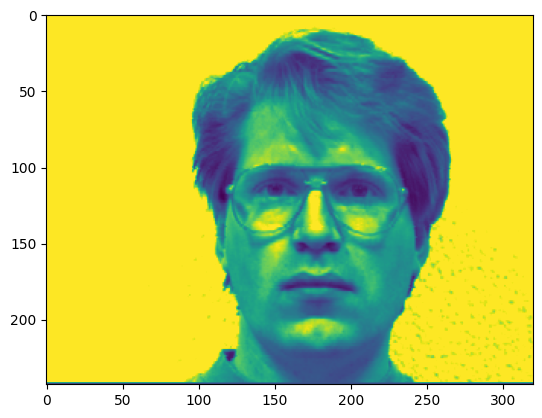

In [3]:
filename = "YaleFaces/subject01.glasses"
pixels = plt.imread(filename)

rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
print(rgb_pixels.shape)
plt.imshow(pixels)
plt.show()

In [8]:
array1 = array(pixels)
#Memory occupied by the multi-dimensional array
size1 = getsizeof(array1)
print(array1)

[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 252 255 255]
 [255 255 255 ... 255 255 255]
 [ 68  68  68 ...  68  68  68]]


In [9]:
#Using Flatten function on array 1 to convert the multi-dimensional
# array to 1-D array
array2 = array1.flatten()
#Memory occupied by array 2
size2 = getsizeof(array2)
#displaying the 1-D array
print(array2)

[130 130 130 ...  68  68  68]


In [10]:
#Print's the two different size's of the array
print(f"Size of Multidimensional Image : {size1}")
print(f"Size of Flattened Image : {size2}")
difference = size1 - size2
#Print's the difference of memory between the size of Multidimensional & 1-D array
print("Size difference in the images: ", difference)

Size of Multidimensional Image : 77888
Size of Flattened Image : 77872
Size difference in the images:  16


Contents of the directory: ['subject06.wink', 'subject04.sleepy', 'subject06.centerlight', 'subject01.happy', 'subject12.normal', 'subject03.wink', 'subject06.surprised', 'subject03.leftlight', 'subject13.leftlight', 'subject07.noglasses', 'subject05.normal', 'subject04.rightlight', 'subject14.glasses', 'subject08.noglasses', 'subject10.rightlight', 'data', 'subject14.wink', 'subject09.sleepy', 'subject13.happy', 'subject12.happy', 'subject05.sleepy', 'subject07.wink', 'subject01.centerlight', 'subject08.centerlight', 'subject11.normal', 'subject06.rightlight', 'subject02.sleepy', 'subject03.sad', 'subject11.noglasses', 'subject03.normal', 'subject02.leftlight', 'subject15.leftlight', 'subject15.noglasses', 'subject14.happy', 'subject03.sleepy', 'subject08.wink', 'subject15.sleepy', 'subject11.sleepy', 'subject06.sleepy', 'subject06.noglasses', 'subject15.surprised', 'subject14.noglasses', 'subject07.surprised', 'subject13.sad', 'subject09.glasses', 'subject11.sad', 'subject14.normal',

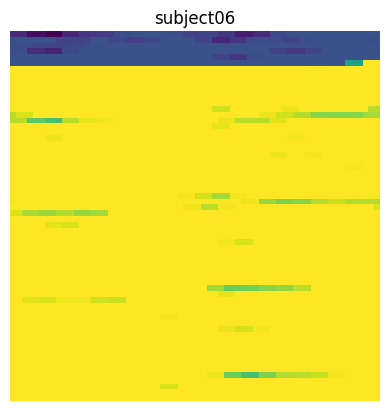

In [18]:
directory = "YaleFaces/"  # Adjust this to your actual path

# Function to load images from the directory
def load_images_from_directory(directory):
    image_data = []
    labels = []
    for filename in os.listdir(directory):
        # img_path = os.path.join(directory, filename)
        # pixels = plt.imread(img_path)

        # rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
        # print(rgb_pixels.shape)
        # plt.imshow(pixels)
        # plt.show()

        # ignore readme.md
        if filename == "Readme.txt":
            continue
        # ignore the directory wth name "data"
        if filename == "data":
            continue
        img_path = os.path.join(directory, filename)

        # Load the image using PIL
        image = Image.open(img_path)

        # Convert to RGB if it's not
        if image.mode != 'RGB':
            rgb_image = image.convert('RGB')
        else:
            rgb_image = image

        # Flattening each image
        array2 = np.array(rgb_image).flatten()

        # Resize image to a standard size (e.g., 64x64)
        resized_image = np.resize(array2, (64, 64))

        # Convert to numpy array and normalize pixel values
        rgb_array = resized_image / 255.0

        # Append to data and labels
        image_data.append(rgb_array)
        labels.append(filename.split('.')[0])  # Store the subject name as label (without the extension)

    return np.array(image_data), np.array(labels)

# Debugging: Check the contents of the directory
print("Contents of the directory:", os.listdir(directory))

# Load images
image_data, labels = load_images_from_directory(directory)

# Print the shape of the loaded images
print("Image Data Shape:", image_data.shape)
print("Labels Shape:", labels.shape)

# Ensure there are images loaded before displaying
if image_data.size > 0:
    # Display the first image
    plt.imshow(image_data[0])
    plt.axis('off')  # Hide axis labels
    plt.title(labels[0])  # Show the subject's label
    plt.show()
else:
    print("No images loaded. Please check the directory.")

In [19]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (132, 64, 64)
Testing Data Shape: (33, 64, 64)


In [20]:
import numpy as np
from collections import Counter

class SimpleDecisionTree:
    def __init__(self):
        self.mean_values = {}

    def fit(self, X, y):
        # Calculate mean pixel values for each class
        for label in set(y):
            class_images = X[y == label]
            self.mean_values[label] = np.mean(class_images, axis=(0, 1, 2))  # Mean of images for each class

    def predict(self, X):
        predictions = []
        for x in X:
            # Calculate distances to each class mean
            distances = {label: np.linalg.norm(x - mean) for label, mean in self.mean_values.items()}
            # Find the class with the minimum distance
            predicted_label = min(distances, key=distances.get)
            predictions.append(predicted_label)
        return np.array(predictions)

# Train the decision tree
model = SimpleDecisionTree()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)


In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Error Rate:", 1 - accuracy)

Accuracy: 0.09090909090909091
Error Rate: 0.9090909090909091
